In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD, adam

Using TensorFlow backend.


In [3]:
unifilename = './2011 Census Microdata Teaching File.csv'
with open(unifilename, 'rU') as f:  #opens PW file
    unidataLi = list(list(rec) for rec in csv.reader(f, delimiter=','))

/Users/yangminglin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


In [4]:
(unidataLi)

[['Person ID',
  'Region',
  'Residence Type',
  'Family Composition',
  'Population Base',
  'Sex',
  'Age',
  'Marital Status',
  'Student',
  'Country of Birth',
  'Health',
  'Ethnic Group',
  'Religion',
  'Economic Activity',
  'Occupation',
  'Industry',
  'Hours worked per week',
  'Approximated Social Grade'],
 ['7394816',
  'E12000001',
  'H',
  '2',
  '1',
  '2',
  '6',
  '2',
  '2',
  '1',
  '2',
  '1',
  '2',
  '5',
  '8',
  '2',
  '-9',
  '4'],
 ['7394745',
  'E12000001',
  'H',
  '5',
  '1',
  '1',
  '4',
  '1',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
  '8',
  '6',
  '4',
  '3'],
 ['7395066',
  'E12000001',
  'H',
  '3',
  '1',
  '2',
  '4',
  '1',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '6',
  '11',
  '3',
  '4'],
 ['7395329',
  'E12000001',
  'H',
  '3',
  '1',
  '2',
  '2',
  '1',
  '2',
  '1',
  '2',
  '1',
  '2',
  '1',
  '7',
  '7',
  '3',
  '2'],
 ['7394712',
  'E12000001',
  'H',
  '3',
  '1',
  '1',
  '5',
  '4',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
 

In [5]:
data = unidataLi[1:]

In [6]:
for item in data :
    if item[1] == 'E12000001':
        item[1] = '1'
    elif item[1] == 'E12000002':
        item[1] = '2'
    elif item[1] == 'E12000003':
        item[1] = '3'
    elif item[1] == 'E12000004':
        item[1] = '4'
    elif item[1] == 'E12000005':
        item[1] = '5'
    elif item[1] == 'E12000006':
        item[1] = '6'
    elif item[1] == 'E12000007':
        item[1] = '7'
    elif item[1] == 'E12000008':
        item[1] = '8'
    elif item[1] == 'E12000009':
        item[1] = '9'
    elif item[1] == 'W92000004':
        item[1] = '10'
    
    if item[2] == 'C':
        item[2] = 1
    elif item[2] == 'H':
        item[2] = 2

In [7]:
(data[:100])

[['7394816',
  '1',
  2,
  '2',
  '1',
  '2',
  '6',
  '2',
  '2',
  '1',
  '2',
  '1',
  '2',
  '5',
  '8',
  '2',
  '-9',
  '4'],
 ['7394745',
  '1',
  2,
  '5',
  '1',
  '1',
  '4',
  '1',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
  '8',
  '6',
  '4',
  '3'],
 ['7395066',
  '1',
  2,
  '3',
  '1',
  '2',
  '4',
  '1',
  '2',
  '1',
  '1',
  '1',
  '1',
  '1',
  '6',
  '11',
  '3',
  '4'],
 ['7395329',
  '1',
  2,
  '3',
  '1',
  '2',
  '2',
  '1',
  '2',
  '1',
  '2',
  '1',
  '2',
  '1',
  '7',
  '7',
  '3',
  '2'],
 ['7394712',
  '1',
  2,
  '3',
  '1',
  '1',
  '5',
  '4',
  '2',
  '1',
  '1',
  '1',
  '2',
  '1',
  '1',
  '4',
  '3',
  '2'],
 ['7394750',
  '1',
  2,
  '2',
  '1',
  '1',
  '6',
  '2',
  '2',
  '1',
  '2',
  '1',
  '1',
  '1',
  '9',
  '2',
  '3',
  '3'],
 ['7394871',
  '1',
  2,
  '5',
  '1',
  '2',
  '4',
  '3',
  '2',
  '1',
  '2',
  '1',
  '1',
  '1',
  '6',
  '11',
  '2',
  '3'],
 ['7394832',
  '1',
  2,
  '3',
  '1',
  '2',
  '1',
  '1',
  '2',
  '1',
  '2',

In [8]:
new_data = []
for i in range(0,len(data)):
    new_data.append(np.array(data[i][1:], dtype=float))

In [9]:
len(new_data)

569741

In [10]:
new_data[0]

array([ 1.,  2.,  2.,  1.,  2.,  6.,  2.,  2.,  1.,  2.,  1.,  2.,  5.,
        8.,  2., -9.,  4.])

In [111]:
x = np.array([new_data[k][:16] for k in range(0,len(new_data))] , dtype=float)

In [112]:
len(x[10])

16

In [143]:
Y = ([new_data[k][16] for k in range(0,len(new_data))])
Y

[4.0,
 3.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 -9.0,
 2.0,
 4.0,
 4.0,
 -9.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 4.0,
 -9.0,
 4.0,
 4.0,
 4.0,
 3.0,
 -9.0,
 4.0,
 1.0,
 -9.0,
 2.0,
 4.0,
 1.0,
 4.0,
 2.0,
 4.0,
 2.0,
 3.0,
 4.0,
 4.0,
 4.0,
 -9.0,
 -9.0,
 3.0,
 -9.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 2.0,
 -9.0,
 -9.0,
 3.0,
 1.0,
 4.0,
 2.0,
 3.0,
 4.0,
 2.0,
 2.0,
 2.0,
 3.0,
 -9.0,
 1.0,
 3.0,
 2.0,
 4.0,
 4.0,
 -9.0,
 4.0,
 1.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 2.0,
 -9.0,
 1.0,
 3.0,
 2.0,
 -9.0,
 -9.0,
 -9.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 -9.0,
 -9.0,
 4.0,
 -9.0,
 4.0,
 3.0,
 4.0,
 -9.0,
 -9.0,
 -9.0,
 -9.0,
 3.0,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 -9.0,
 4.0,
 2.0,
 1.0,
 4.0,
 3.0,
 2.0,
 3.0,
 1.0,
 4.0,
 4.0,
 3.0,
 2.0,
 3.0,
 2.0,
 2.0,
 4.0,
 -9.0,
 -9.0,
 3.0,
 2.0,
 3.0,
 4.0,
 3.0,
 2.0,
 2.0,
 1.0,
 -9.0,
 2.0,
 4.0,
 4.0,
 -9.0,
 2.0,
 4.0,
 -9.0,
 4.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 -9.0,
 1.0,
 3.0,
 -9.0,
 4.0,
 4.0,
 1.0,
 -9.0,
 3.0,
 4

In [186]:
y = []

for item in Y :
    
    if item == 1.0 :
        y.append([1,0,0,0,0])
    elif item == 2.0 :
         y.append([0,1,0,0,0])
    elif item == 3.0 :
         y.append([0,0,1,0,0])
    elif item == 4.0 :
         y.append([0,0,0,1,0])
    elif item == -9.0 :
         y.append([0,0,0,0,1])
        


In [187]:
y = np.array(y, dtype=float)
y

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [188]:
len(y)

569741

In [189]:
x.shape

(569741, 16, 1)

In [190]:
x.shape=(x.shape[0], x.shape[1] ,1)

In [191]:
x.shape

(569741, 16, 1)

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [209]:
len(X_train)

170922

In [194]:
featurenum = len(X_train[0])
featurenum

16

In [195]:
# %load layer.py
# %load layer.py
conv_layer = [
    
    Conv1D(10, 4, padding='same', input_shape=(featurenum,1)),
    Activation('relu'),
    MaxPooling1D(2),
    
    Conv1D(50, 4, padding='same'),
    Activation('relu'),
    MaxPooling1D(2),
    
    Conv1D(100, 4, padding='same'),
    Activation('relu'),
    
]
fc_layer = [
    
    Flatten(),
    Dense(20),
    Dropout(0.2),
    Activation('relu'),
    Dense(5),
    Activation('sigmoid') ### 0-1 之間
]
model_block_addition = Sequential(conv_layer + fc_layer)
model_block_addition.compile(loss='mse',
              optimizer=adam(lr=0.001),
              metrics=['mae']) #adam
model_block_addition.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           (None, 16, 10)            50        
_________________________________________________________________
activation_94 (Activation)   (None, 16, 10)            0         
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 8, 10)             0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 8, 50)             2050      
_________________________________________________________________
activation_95 (Activation)   (None, 8, 50)             0         
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 4, 50)             0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 4, 100)            20100     
__________

In [177]:
#%load layer.py
# %load layer.py
conv_layer = [
    
    Conv1D(10, 2, padding='same', input_shape=(featurenum,1)),
    Activation('relu'),
    
    
    Conv1D(20, 2, padding='same'),
    Activation('relu'),
    MaxPooling1D(2),
    
    Conv1D(30, 2, padding='same'),
    Activation('relu'),
    
    
    Conv1D(40,2,padding='same'),
    Activation('relu'),
    MaxPooling1D(2),
    
    Conv1D(100,2,padding='same'),
    Activation('relu'),
]
fc_layer = [
    
    Flatten(),
    Dense(20),
    Dropout(0.3),
    Activation('relu'),
    Dense(5),
    Activation('sigmoid') ### 0-1 之間
]
model_block_addition = Sequential(conv_layer + fc_layer)
model_block_addition.compile(loss='categorical_crossentropy',
              optimizer=adam(lr=0.001),
              metrics=['accuracy']) #adam
model_block_addition.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 16, 10)            30        
_________________________________________________________________
activation_87 (Activation)   (None, 16, 10)            0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 16, 20)            420       
_________________________________________________________________
activation_88 (Activation)   (None, 16, 20)            0         
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 8, 20)             0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 8, 30)             1230      
_________________________________________________________________
activation_89 (Activation)   (None, 8, 30)             0         
__________

In [196]:
model_block_addition.fit(X_train, y_train, epochs=10, batch_size = 128,verbose = 2)

Epoch 1/10
11s - loss: 0.0797 - mean_absolute_error: 0.1604
Epoch 2/10
10s - loss: 0.0622 - mean_absolute_error: 0.1198
Epoch 3/10
10s - loss: 0.0582 - mean_absolute_error: 0.1126
Epoch 4/10
10s - loss: 0.0558 - mean_absolute_error: 0.1085
Epoch 5/10
10s - loss: 0.0541 - mean_absolute_error: 0.1055
Epoch 6/10
10s - loss: 0.0527 - mean_absolute_error: 0.1026
Epoch 7/10
10s - loss: 0.0519 - mean_absolute_error: 0.1006
Epoch 8/10
10s - loss: 0.0510 - mean_absolute_error: 0.0987
Epoch 9/10
10s - loss: 0.0505 - mean_absolute_error: 0.0972
Epoch 10/10
11s - loss: 0.0499 - mean_absolute_error: 0.0960


In [200]:
y_predict = model_block_addition.predict(X_test)

In [205]:
y_predict[10]

array([  1.25369674e-03,   9.97266054e-01,   1.82777768e-07,
         3.39491203e-06,   7.87092336e-11], dtype=float32)

In [206]:
%run calculateLoss.py

In [207]:
calPcc(y_predict, y_test)

0.80341310455777981

In [208]:
len(y_test)

398819

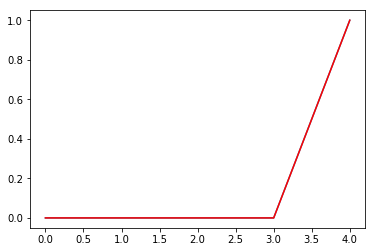

In [210]:
plt.plot(y_test[300])
plt.plot(y_predict[300],'r')

In [ ]:
# %load calculateLoss.py
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity

def calPcc(y_predict, y_test) :

    resultLi = []
    score = 0

    for i in range(0,len(y_predict)) :
        score = pearsonr(y_predict[i] , y_test[i] )
        resultLi.append(score)

    pccLi = []
    for result in resultLi :
        pccLi.append(result[0])

    return sum(pccLi)/len(pccLi)


def calCos(y_predict,y_test) :
    cosLi = []
    score = 0
    for i in range(0,len(y_predict)) :
        score = cosine_similarity(y_predict[i] , y_test[i] )
        cosLi.append(score)
    
    return sum(cosLi)/len(cosLi)


def cal_Pcc_Cos(model, prediction, validation) :
    
    train_predict = model.predict(prediction)
    
    train_Pcc = calPcc(train_predict, validation)
        
    train_Cos = calCos(train_predict, validation)
    
    return (train_Pcc,train_Cos)
    
    


In [215]:
resultLi = []
for i in range(0,len(y_predict)) :
    score = pearsonr(y_predict[i] , y_test[i] )
    resultLi.append(score)

pccLi = []
for result in resultLi :
    pccLi.append(result[0])